In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [ ]:
X, y = make_circles(1000, noise = 0.03, random_state=42)

In [ ]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.1694 - accuracy: 0.4680
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 3.8901 - accuracy: 0.4730
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 3.2669 - accuracy: 0.4700
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 1.2579 - accuracy: 0.4770
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7602 - accuracy: 0.4730


In [ ]:
import numpy as np
def plot_decision_boundary(model,X,y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min,x_max = X[:,0].min()- 0.1, X[:,0].max()+ 0.1
  y_min,y_max = X[:,1].min()- 0.1, X[:,1].max()+ 0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
  np.linspace(y_min,y_max,100))
  #Create X values
  x_in = np.c_[xx.ravel(),yy.ravel()] #Stack 2-D drrays together
  # Make prediction:
  y_pred = model.predict(x_in)
  #Check for multi-class
  if len(y_pred[0])>1:
    print("Doing multi-class classification\n")
    # Reshape prediction for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification\n")
    y_pred = np.round(y_pred).reshape(xx.shape)
  #Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 2s 5ms/step
Doing binary classification



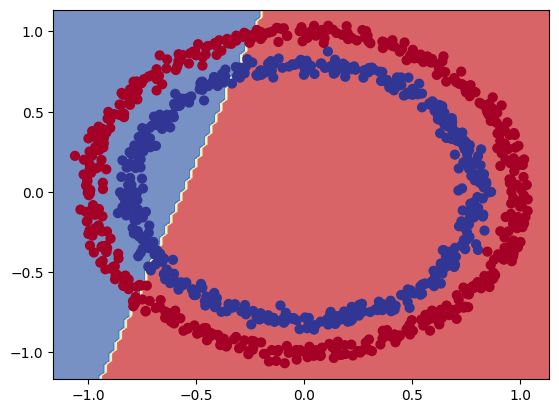

In [ ]:
plot_decision_boundary(model, X, y)

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history = model_1.fit(X,y, epochs=20)

Epoch 1/20
32/32 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5010
Epoch 2/20
32/32 [==============================] - 0s 10ms/step - loss: 0.6840 - accuracy: 0.5000
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5050
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5320
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6030
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6350
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.7100
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.8450
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.8360
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.9210
Epoch 11/20
32/32 

313/313 [==============================] - 0s 1ms/step
Doing binary classification



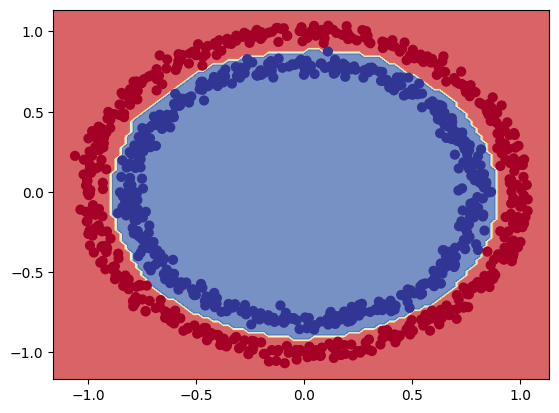

In [ ]:
plot_decision_boundary(model_1, X,y)

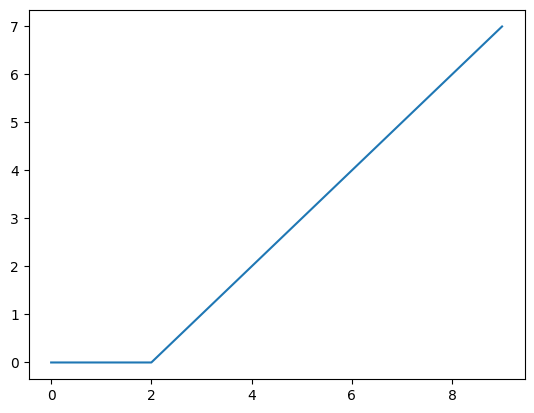

In [ ]:
a = tf.Variable([-2.,-1.,0.,1.,2.,3.,4.,5.,6.,7.])
def relu(x):
  return tf.maximum(0,x)
plt.plot(relu(a))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) #0.2->20% test size and 80% train size


<Axes: >

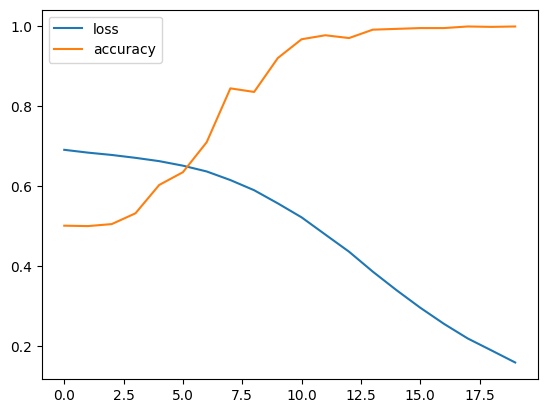

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
#finding the ideal learning rate
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
history_4 = model_4.fit(X_train, y_train, epochs=50,
                        callbacks=[lr])

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5063 - lr: 1.2589e-04
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5050 - lr: 1.4125e-04
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5038 - lr: 1.7783e-04
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5100 - lr: 1.9953e-04
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5075 - lr: 2.2387e-04
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6862 -

<Axes: >

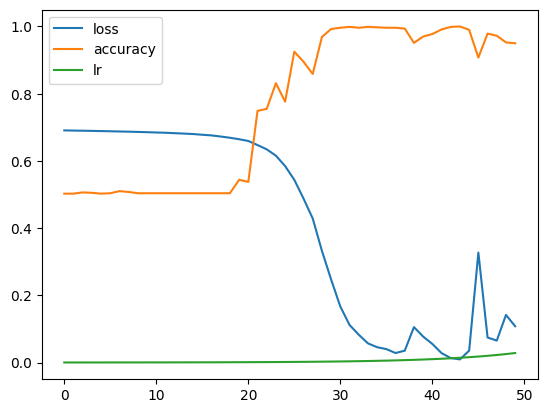

In [ ]:
pd.DataFrame(history_4.history).plot()

In [ ]:
pd.DataFrame(history_4.history)

,loss,accuracy,lr
0,0.690788,0.50250,0.000100
1,0.690224,0.50250,0.000112
2,0.689766,0.50625,0.000126
3,0.689269,0.50500,0.000141
4,0.688735,0.50250,0.000158
5,0.688166,0.50375,0.000178
6,0.687526,0.51000,0.000200
7,0.686958,0.50750,0.000224
8,0.686223,0.50375,0.000251
9,0.685416,0.50375,0.000282
